# Assignment-04-Simple Linear Regression-Q_1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
# import dataset
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# EDA and Data Visualization

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
#Feature Engineering
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
#correlation Analysis
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cd77b5d50>,
      dtype=object)

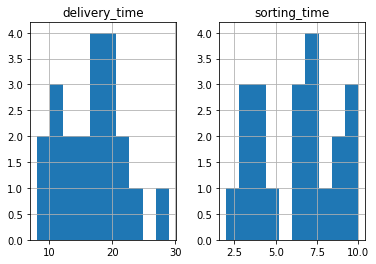

In [8]:
#Histogram
data.hist()

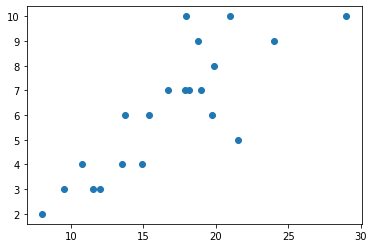

In [9]:
#scatter plot
x = data.delivery_time
y = data.sorting_time
plt.scatter(x,y)
plt.xlabel=("delivery_time")
plt.ylabel=("sorting_time")

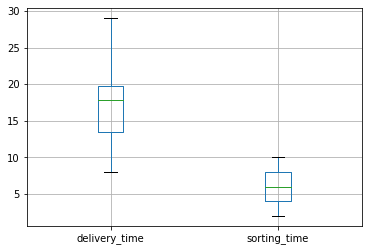

In [10]:
#boxplot
data.boxplot()

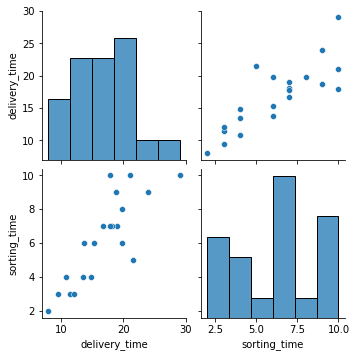

In [11]:
#pairplot
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


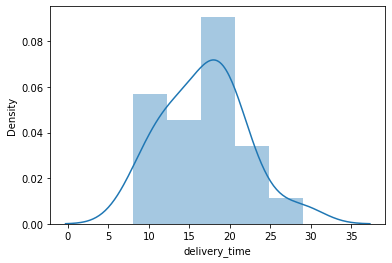

In [12]:
#distplot to check the normality
sns.distplot(data['delivery_time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


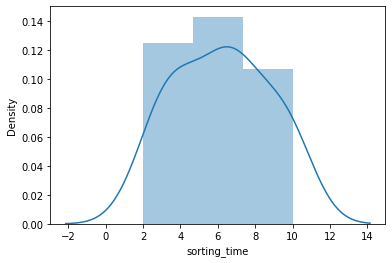

In [13]:
sns.distplot(data['sorting_time'])

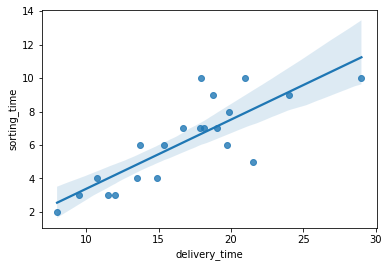

In [14]:
sns.regplot(x='delivery_time', y='sorting_time', data=data)

# Model Building

In [15]:
model=smf.ols("sorting_time~delivery_time ", data=data).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        12:47:46   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Finding Coefficient parameters
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [17]:
# Finding tvalues and pvalues
print(model.tvalues,'\n' ,model.pvalues)

Intercept       -0.667290
delivery_time    6.387447
dtype: float64 
 Intercept        0.512611
delivery_time    0.000004
dtype: float64


In [18]:
# Finding Rsquared Values and Adjusted Rsquared value
(model.rsquared,model.rsquared_adj)

(0.682271474841723, 0.6655489208860242)

# Transformation models

In [19]:
#build log transformation model to increase r-squared value.
model2 = smf.ols("np.log(sorting_time)~delivery_time", data=data).fit() 
model2.params
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Mon, 28 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                          12:48:03   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [21]:
#build sqrt transformation model to increase r-squared value.
model3 = smf.ols("np.sqrt(sorting_time)~delivery_time", data=data).fit() 
model3.params
model3.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(sorting_time)   R-squared:                       0.696
Model:                               OLS   Adj. R-squared:                  0.680
Method:                    Least Squares   F-statistic:                     43.46
Date:                   Mon, 28 Nov 2022   Prob (F-statistic):           2.61e-06
Time:                           12:48:12   Log-Likelihood:                -3.5906
No. Observations:                     21   AIC:                             11.18
Df Residuals:                         19   BIC:                             13.27
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9609      0.233      4.128      0.001       0.474       1.448
delivery_time     0.0877      0.013      6.592      0.000       0.060       0.116
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.114
Skew:                           0.099   Prob(JB):                        0.945
Kurtosis:                       2.698   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
(model3.rsquared,model3.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [23]:
#build X-square transformation model to increase r-squared value.
model4 = smf.ols("(sorting_time)**2~delivery_time",data=data).fit() 
model4.params
model4.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        12:48:23   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
(model4.rsquared,model4.rsquared_adj)

(0.682271474841723, 0.6655489208860242)

# Model Predictions

In [25]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [26]:
# Automatic Prediction for say sorting time 10,5
new_data=pd.Series([10,5])
new_data

0    10
1     5
dtype: int64

In [27]:
data_pred=pd.DataFrame(new_data, columns=['delivery_time'])
data_pred

,delivery_time
0,10
1,5


In [28]:
model3.predict(data_pred)

0    1.837641
1    1.399287
dtype: float64

# Inference

Hence, np.sqrt transformation model is suitable accuracy for the data.